In [185]:
#Import all the packages needed for the project in this cell
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
#As well, import all the raw data to be used in this analysis
weather_data=pd.read_csv('weatherAUS.csv')
house_data=pd.read_csv('Melbourne_housing_FULL.csv')


# Analyze and preliminary cleansing of the Data

In [186]:
weather_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [187]:
weather_data.shape

(145460, 23)

In [188]:
house_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [189]:
house_data.shape

(34857, 21)

#### First remove columns that will not be neccesary 

In [190]:
house_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [191]:
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [192]:
weather_data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [193]:
#Remove the columns that will not make it into the final dataset
weather_data=weather_data.drop(['RainTomorrow','Evaporation','MinTemp','WindGustDir','WindDir9am','WindDir3pm'],axis=1)
weather_data.columns

Index(['Date', 'Location', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [194]:
house_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [195]:
#Remove the columns that won't make it to the final dataset
#BuildingArea would be an important metric to use, however there are not enough datapoints to include
house_data=house_data.drop(['Method','SellerG','BuildingArea',],axis=1)
house_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Date', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

#### Transform date columns inorder to create one dataset 

In [196]:
house_data['Date']=house_data['Date'].apply(pd.to_datetime)
weather_data['Date']=weather_data['Date'].apply(pd.to_datetime)

In [197]:
house_data['Date']=house_data['Date'].dt.date
weather_data['Date']=weather_data['Date'].dt.date

In [198]:
min_date=house_data['Date'].min()
max_date=weather_data['Date'].max()
house_data=house_data.loc[house_data['Date']<=max_date]
weather_data=weather_data.loc[weather_data['Date']>=min_date]
print(house_data['Date'].max()<=max_date) #There are no rows for the date of the max, so this suffices
print(weather_data['Date'].min()>=min_date)

True
True


#### Transform the datasets so dates are the index, sorted by least recent to most recent 

In [199]:
weather_data=weather_data.loc[weather_data['Location']=='Melbourne']

In [200]:
weather_data=weather_data.sort_values(['Date'],ascending=True)
house_data=house_data.sort_values(['Date'],ascending=True)

In [201]:
all_data=house_data.merge(weather_data,on=['Date'])

In [202]:
all_data.head()

,Suburb,Address,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Surrey Hills,999A Riversdale Rd,3,h,1205000.0,2016-01-28,11.2,3127.0,3.0,1.0,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canterbury,140 Canterbury Rd,4,h,NaN,2016-01-28,9.0,3126.0,4.0,2.0,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Surrey Hills,1/10 Florence Rd,2,u,813000.0,2016-01-28,11.2,3127.0,2.0,1.0,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Caulfield South,336 Bambra Rd,2,h,NaN,2016-03-09,9.3,3162.0,NaN,NaN,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Caulfield South,26 Flowers St,3,h,1577500.0,2016-03-09,9.3,3162.0,3.0,2.0,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
all_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            3886
Date                0
Distance            0
Postcode            0
Bedroom2         3732
Bathroom         3732
Car              3754
Landsize         4017
YearBuilt        9009
CouncilArea         0
Lattitude        3618
Longtitude       3618
Regionname          0
Propertycount       0
Location            0
MaxTemp          1722
Rainfall         1722
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am      1722
Humidity3pm      1722
Pressure9am      1722
Pressure3pm      1722
Cloud9am         1722
Cloud3pm         1722
Temp9am          1722
Temp3pm          1722
RainToday        1722
dtype: int64

### Now that the datasets are combined, it is time to remove rows that don't contain enough information

In [204]:
all_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Date', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount',
       'Location', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [205]:
#Remove the rows that are missing all those data points
data=all_data.dropna(subset=weather_data.columns)
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            3516
Date                0
Distance            0
Postcode            0
Bedroom2         3358
Bathroom         3358
Car              3380
Landsize         3642
YearBuilt        8206
CouncilArea         0
Lattitude        3257
Longtitude       3257
Regionname          0
Propertycount       0
Location            0
MaxTemp             0
Rainfall            0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
dtype: int64

In [206]:
#Remove all rows that don't contain a price
data=data.dropna(subset=['Price'])
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Date                0
Distance            0
Postcode            0
Bedroom2         2591
Bathroom         2591
Car              2607
Landsize         2814
YearBuilt        6431
CouncilArea         0
Lattitude        2514
Longtitude       2514
Regionname          0
Propertycount       0
Location            0
MaxTemp             0
Rainfall            0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
dtype: int64

In [207]:
data.shape

(12191, 34)

In [208]:
data.head()

,Suburb,Address,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
1722,Footscray,95 Gordon St,3,h,780000.0,2016-05-14,6.4,3011.0,3.0,1.0,...,22.0,72.0,55.0,1020.5,1016.1,1.0,2.0,16.6,21.5,No
1723,Ashburton,36 Alamein Av,2,h,1356000.0,2016-05-14,11.0,3147.0,NaN,NaN,...,22.0,72.0,55.0,1020.5,1016.1,1.0,2.0,16.6,21.5,No
1724,Pascoe Vale,6 Merbein St,2,h,680000.0,2016-05-14,9.9,3044.0,2.0,1.0,...,22.0,72.0,55.0,1020.5,1016.1,1.0,2.0,16.6,21.5,No
1725,Ashburton,6a Glen Rd,3,h,1662000.0,2016-05-14,11.0,3147.0,3.0,2.0,...,22.0,72.0,55.0,1020.5,1016.1,1.0,2.0,16.6,21.5,No
1729,Pascoe Vale,199 Cumberland Rd,3,h,900000.0,2016-05-14,9.9,3044.0,3.0,2.0,...,22.0,72.0,55.0,1020.5,1016.1,1.0,2.0,16.6,21.5,No


In [249]:
data.corr().iloc[:,10:26]

,MaxTemp,Rainfall,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
Rooms,0.029076,-0.002223,0.016543,-0.008748,-0.014133,-0.030640,0.001090,-0.024821,0.002828,0.002307,-0.002065,-0.013491,0.014321,0.032030
Price,-0.005242,-0.024747,0.027014,-0.028464,-0.048106,-0.013457,0.015858,0.004613,0.032045,0.034195,0.030852,-0.028220,-0.018099,-0.006906
Distance,0.134446,0.028345,0.072163,-0.000094,0.044817,-0.075139,-0.042230,-0.092566,-0.005468,-0.010889,-0.073918,-0.037819,0.119625,0.140357
Postcode,0.062432,0.018614,0.043558,-0.010573,0.002136,-0.042073,-0.012555,-0.044642,0.007532,0.004902,-0.026910,-0.027849,0.049517,0.064458
Bedroom2,0.039139,-0.008590,0.031569,-0.016846,-0.015455,-0.037985,-0.001791,-0.028857,0.013489,0.013008,-0.009419,-0.021096,0.021829,0.041283
Bathroom,0.037415,-0.013727,0.026906,-0.006158,-0.005154,-0.017031,-0.012538,-0.030833,0.013862,0.007555,-0.014049,-0.023969,0.020863,0.036741
Car,0.038471,0.004073,0.035319,-0.001194,0.008591,-0.023491,-0.016599,-0.025995,0.013096,0.009360,-0.013359,-0.019035,0.035969,0.039853
Landsize,0.050666,-0.014270,0.045170,-0.031135,-0.010946,-0.035804,-0.010025,-0.028124,0.035673,0.032923,-0.031757,-0.048943,0.035337,0.049461
YearBuilt,0.052251,0.013504,0.028241,-0.009762,0.007852,-0.026455,0.003345,-0.025518,0.000089,-0.001578,-0.050735,-0.024094,0.035565,0.051134
Propertycount,0.015046,0.006138,0.016138,0.007779,0.016560,0.013771,-0.016595,-0.026179,-0.005548,-0.006381,-0.028767,-0.005555,0.000863,0.014024


### Unfortunately, the strongest correlated variables to price are variables that contain N.As. I was hesitant to remove those rows, but I feel like it would be best for analysis 

In [210]:
data=data.dropna()
data=data.drop(['Location'],axis=1)
data.shape

(5634, 33)

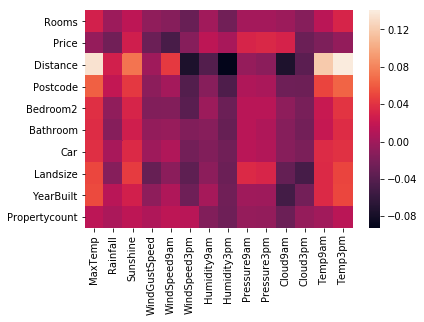

In [251]:
sns.heatmap(data.corr().iloc[:10,10:26])

In [212]:
#Remove longtitude and Latitude from the dataset, but keeping them as external variables for data visualization purposes.
house_long=data.pop('Longtitude')
house_lat=data.pop('Lattitude')

In [213]:
round(data.describe(),2)


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,5634.00,5634.00,5634.00,5634.00,5634.00,5634.00,5634.00,5634.00,5634.00,5634.00,...,5634.00,5634.00,5634.00,5634.00,5634.00,5634.00,5634.00,5634.00,5634.0,5634.0
mean,2.89,1076078.24,9.33,3100.97,2.86,1.55,1.56,470.55,1963.32,7487.25,...,12.25,16.18,72.60,58.48,1018.60,1015.97,5.30,4.89,13.6,17.8
std,0.98,672594.31,5.16,77.34,0.98,0.70,0.94,948.86,38.07,4361.84,...,7.07,8.44,13.53,17.42,6.16,6.74,2.69,2.80,4.1,5.6
min,1.00,131000.00,0.00,3000.00,0.00,0.00,0.00,0.00,1196.00,389.00,...,0.00,2.00,43.00,24.00,1002.60,1000.40,0.00,0.00,5.4,10.2
25%,2.00,623875.00,5.90,3046.00,2.00,1.00,1.00,144.00,1940.00,4442.00,...,6.00,11.00,64.00,44.00,1014.40,1011.90,4.00,1.00,11.1,13.2
50%,3.00,888000.00,8.80,3084.00,3.00,1.00,1.00,351.00,1970.00,6567.00,...,13.00,15.00,71.00,58.00,1017.70,1016.60,7.00,7.00,13.2,17.2
75%,3.00,1340750.00,12.00,3146.00,3.00,2.00,2.00,625.00,1998.00,10331.00,...,19.00,19.00,83.00,68.00,1022.70,1021.20,7.00,7.00,15.9,20.2
max,8.00,8000000.00,47.40,3977.00,9.00,8.00,10.00,37000.00,2018.00,21650.00,...,26.00,39.00,95.00,91.00,1033.40,1030.40,8.00,8.00,28.6,35.9


In [214]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
YearBuilt        float64
CouncilArea       object
Regionname        object
Propertycount    float64
MaxTemp          float64
Rainfall         float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

In [215]:
round(data['Price'].describe(),2)

count       5634.00
mean     1076078.24
std       672594.31
min       131000.00
25%       623875.00
50%       888000.00
75%      1340750.00
max      8000000.00
Name: Price, dtype: float64

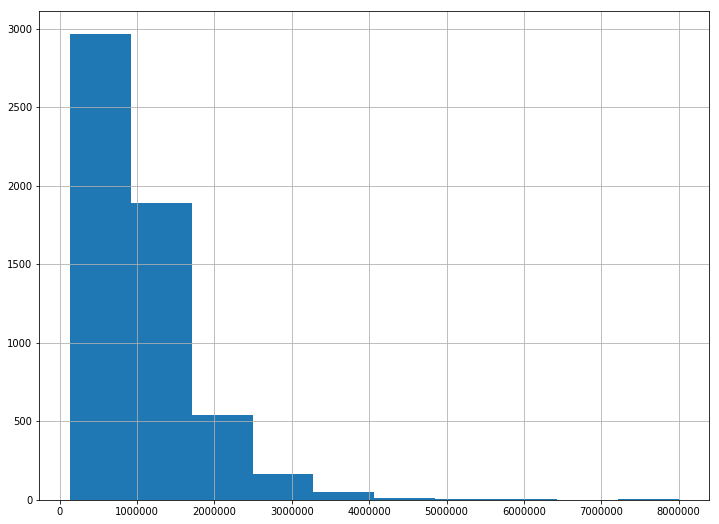

In [216]:
#Visualize the target variable 
data['Price'].hist(figsize = (12,9))


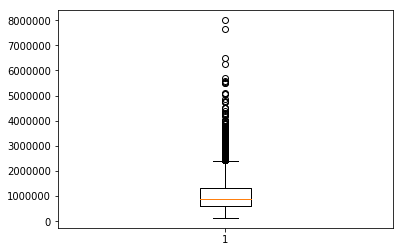

In [217]:
plt.boxplot(data['Price'])
plt.show()

In [218]:
#Considering the different regions of the houses is important to the overall influence of the price variable
round(data.groupby(['Regionname','CouncilArea'])['Price'].describe(),2)

count        mean  \
Regionname                 CouncilArea                                         
Eastern Metropolitan       Banyule City Council            222.0  1008300.68   
                           Boroondara City Council          17.0  1674500.00   
                           Knox City Council                17.0   840705.88   
                           Manningham City Council         140.0  1209197.86   
                           Maroondah City Council           26.0   837923.08   
                           Monash City Council              18.0  1488833.33   
                           Nillumbik Shire Council           1.0  1550000.00   
                           Whitehorse City Council          58.0  1146006.90   
Eastern Victoria           Cardinia Shire Council            1.0   675000.00   
                           Casey City Council                6.0   749250.00   
                           Frankston City Council            3.0   487666.67   
                           Yarra Ranges Shire Council        5.0   742996.40   
Northern Metropolitan      Banyule City Council             49.0   797530.61   
                           Darebin City Council            559.0   890491.21   
                           Hume City Council                98.0   597500.00   
                           Melbourne City Council          226.0   921828.45   
                           Moreland City Council           462.0   844262.55   
                           Whittlesea City Council          42.0   625809.52   
                           Yarra City Council              276.0  1066670.33   
Northern Victoria          Macedon Ranges Shire Council      3.0   626000.00   
                           Melton City Council               3.0   401000.00   
                           Mitchell Shire Council            1.0   411000.00   
                           Nillumbik Shire Council           3.0   700500.00   
                           Yarra Ranges Shire Council        1.0   650000.00   
South-Eastern Metropolitan Casey City Council                4.0   620250.00   
                           Frankston City Council           15.0   797905.73   
                           Greater Dandenong City Council   13.0   699576.92   
                           Kingston City Council            68.0   978946.28   
                           Knox City Council                 4.0   908950.00   
                           Monash City Council               9.0  1030555.56   
Southern Metropolitan      Bayside City Council            235.0  1614236.97   
                           Boroondara City Council         624.0  1671060.58   
                           Glen Eira City Council          408.0  1073149.85   
                           Kingston City Council            29.0   938620.69   
                           Melbourne City Council          187.0  1055351.87   
                           Monash City Council             122.0  1059778.69   
                           Port Phillip City Council       277.0  1134589.35   
                           Stonnington City Council        218.0  1463456.23   
Western Metropolitan       Brimbank City Council           210.0   665140.48   
                           Hobsons Bay City Council        183.0  1015499.18   
                           Hume City Council                14.0   575928.57   
                           Maribyrnong City Council        332.0   807477.54   
                           Melton City Council               9.0   634944.44   
                           Moonee Valley City Council      393.0  1011161.58   
                           Moreland City Council            11.0   736681.82   
                           Wyndham City Council             20.0   548605.00   
Western Victoria           Melton City Council              12.0   423500.00   

                                                                  std  \
Regionname                 CouncilArea                           

In [219]:
round(data.groupby('RainToday')['Price'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
RainToday,,,,,,,,
No,4564.0,1088801.50,680121.43,131000.0,627500.0,900000.0,1360000.0,8000000.0
Yes,1070.0,1021808.19,636949.98,185000.0,610750.0,851750.0,1250000.0,6500000.0


In [220]:
round(data.groupby('Type')['Price'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
h,3592.0,1305935.84,713809.59,131000.0,816000.0,1150000.0,1600000.0,8000000.0
t,537.0,901699.81,363508.84,319000.0,660000.0,825000.0,1060000.0,2700000.0
u,1505.0,589694.67,238567.89,170000.0,432000.0,550000.0,693000.0,2460000.0


In [221]:
round(data.groupby('Date')['Price'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
2016-05-14,112.0,1002536.61,581280.08,312000.0,567500.0,890000.0,1246250.0,3400000.0
2016-05-22,129.0,993963.18,569838.24,330000.0,610000.0,820000.0,1275000.0,3900000.0
2016-05-28,161.0,1135958.39,687653.41,260800.0,625000.0,931000.0,1500000.0,4005000.0
2016-06-08,113.0,1037374.34,591741.12,330000.0,585000.0,900000.0,1316000.0,3250000.0
2016-06-18,163.0,1111510.74,745980.95,256500.0,619000.0,835000.0,1428000.0,4000000.0
2016-06-27,141.0,939225.46,521543.40,250000.0,549000.0,760000.0,1180000.0,2875000.0
2016-07-05,171.0,1048823.10,612195.39,260000.0,597000.0,899000.0,1400000.0,3171000.0
2016-07-11,132.0,980187.88,574028.90,270000.0,580750.0,822500.0,1282500.0,3550000.0
2016-07-16,87.0,914360.31,420588.04,275000.0,575500.0,870000.0,1200000.0,2100000.0


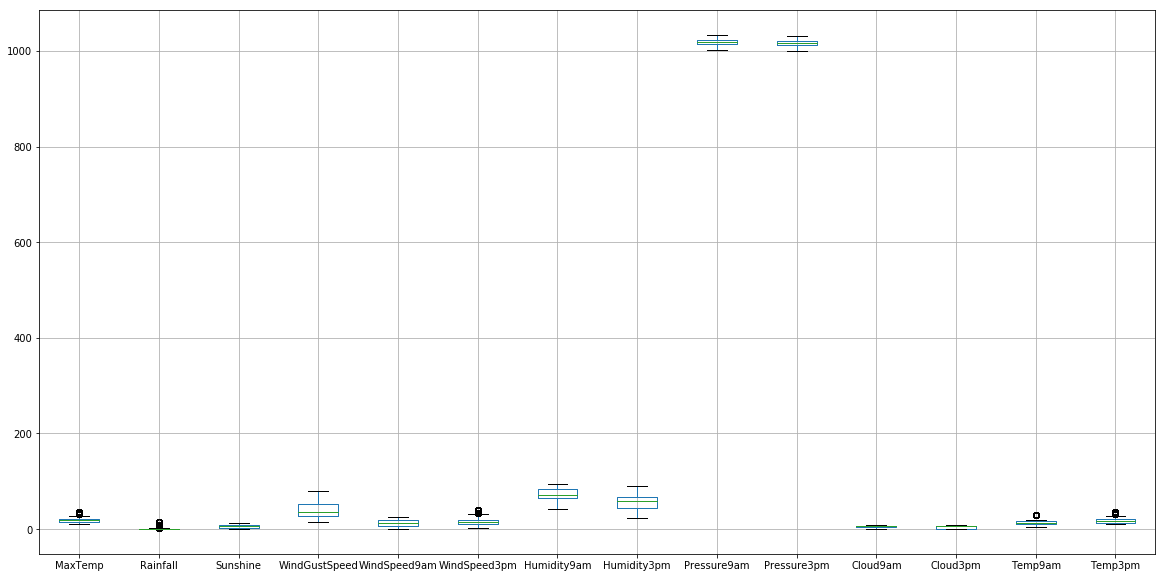

In [222]:
data.iloc[:,16:32].boxplot(figsize=(20,10))

In [235]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
scaler_data=scaler.fit_transform(data.iloc[:,16:30])
data.iloc[:,16:30]=scaler_data

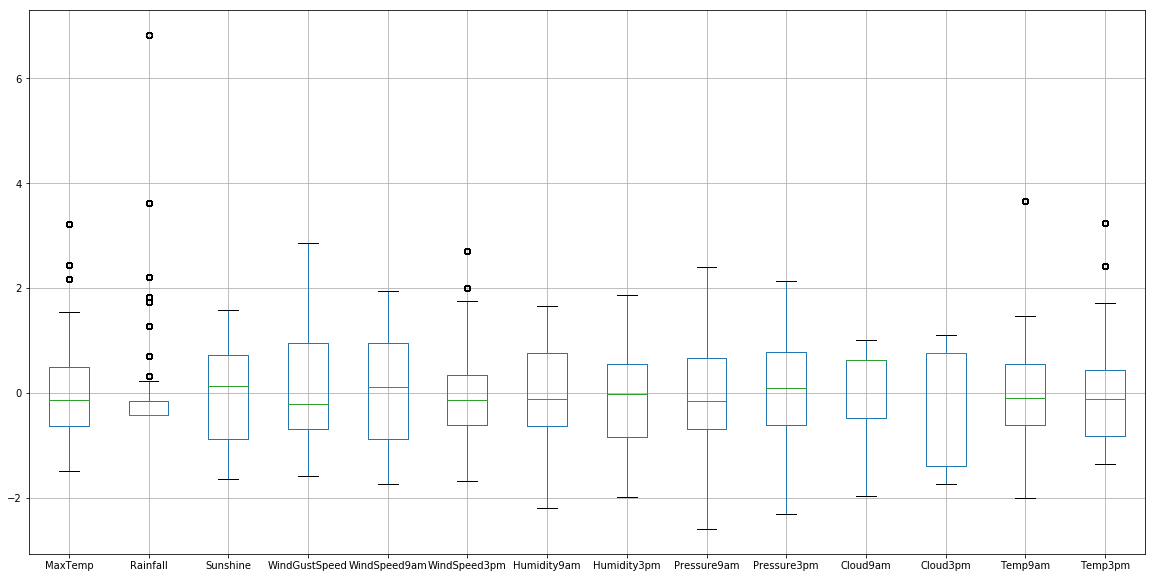

In [236]:
data.iloc[:,16:30].boxplot(figsize=(20,10))

In [237]:
### I think looking for weather indicators that are outliers based on grouped house categories, or the opposite 
#would be the best moving forward

In [238]:
data['Price']=round(data['Price'],2)

In [239]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
YearBuilt        float64
CouncilArea       object
Regionname        object
Propertycount    float64
MaxTemp          float64
Rainfall         float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

# Prepare the Data for Training

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

In [241]:
y=data.Price
y.head()

1722     780000.0
1724     680000.0
1725    1662000.0
1729     900000.0
1731     488000.0
Name: Price, dtype: float64

In [242]:
X=data.drop(['Price','Address','RainToday','Suburb','Type','CouncilArea','Regionname','Date'],axis=1)
X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Propertycount,MaxTemp,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
1722,3,6.4,3011.0,3.0,1.0,2.0,323.0,1900.0,7570.0,0.521162,...,1.379253,0.688922,-0.044523,-0.199893,0.308399,0.018937,-1.594894,-1.02897,0.730668,0.660437
1724,2,9.9,3044.0,2.0,1.0,2.0,590.0,1940.0,7485.0,0.521162,...,1.379253,0.688922,-0.044523,-0.199893,0.308399,0.018937,-1.594894,-1.02897,0.730668,0.660437
1725,3,11.0,3147.0,3.0,2.0,2.0,351.0,2006.0,3052.0,0.521162,...,1.379253,0.688922,-0.044523,-0.199893,0.308399,0.018937,-1.594894,-1.02897,0.730668,0.660437
1729,3,9.9,3044.0,3.0,2.0,2.0,608.0,1940.0,7485.0,0.521162,...,1.379253,0.688922,-0.044523,-0.199893,0.308399,0.018937,-1.594894,-1.02897,0.730668,0.660437
1731,2,9.9,3044.0,3.0,1.0,2.0,219.0,2001.0,7485.0,0.521162,...,1.379253,0.688922,-0.044523,-0.199893,0.308399,0.018937,-1.594894,-1.02897,0.730668,0.660437


In [243]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=99)

In [278]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear',seed=99,verbosity = 0) 
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test) 




C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [279]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
# define model evaluation method
kfold = RepeatedKFold(n_splits=10, random_state=7)
results = cross_val_score(xg_reg, X_train, y_train, cv=kfold)
mse1=mean_squared_error(preds, y_test)
print(mse1)
print("Accuracy: %.3f,(%.3f)" %(results.mean(),results.std()))


C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\U

C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\U

C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\U

107452694717.53242
Accuracy: 0.769,(0.038)


C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


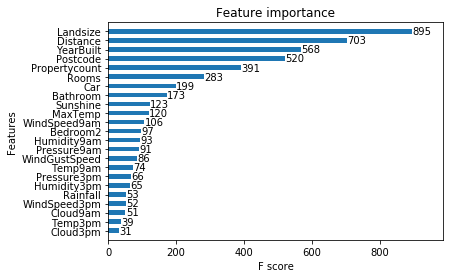

In [280]:
xgb.plot_importance(xg_reg,importance_type='weight',grid=False,height=.5)

In [281]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X.iloc[:,:9],y,test_size=0.25,random_state=99)

In [282]:
xg_reg.fit(Xtrain, ytrain)
preds = xg_reg.predict(Xtest) 

C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [283]:
results = cross_val_score(xg_reg, Xtrain, ytrain, cv=kfold)
mse2=mean_squared_error(preds, ytest)
print(mse2)
print("Accuracy: %.3f,(%.3f)" %(results.mean(),results.std()))

C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\U

C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\U

C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
C:\U

110105607694.02255
Accuracy: 0.771,(0.042)


C:\Users\Jackson\AppData\Roaming\Python\Python36\site-packages\xgboost\data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


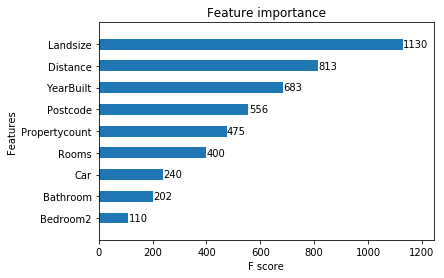

In [284]:
xgb.plot_importance(xg_reg,importance_type='weight',grid=False,height=.5)

In [287]:
mse2-mse1

2652912976.4901276